In [1]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  
import numpy as np
from tools import *
from scipy import ndimage
from math import *
import operator

In [2]:
from sklearn.svm import SVC

In [3]:
data = np.load("15_scenes_Xy.npz", "rb") 
datax=data["X"] 
datay=data["y"] 
tmp_ids,test_ids=compute_split(len(datax))
tmp_x=datax[tmp_ids]
tmp_y=datay[tmp_ids]
test_x=datax[test_ids]
test_y=datay[test_ids]

In [8]:
def one_vs_all(c,datax,datay): 
    svms=dict()
    for cl in np.sort(np.unique(datay)):
        #print('classe:',cl)
        clf = SVC(C=c,gamma='auto',probability=True)
        dataycl = np.where(datay ==cl , 1., -1.) # transformation des étiquettes en {0, 1}       
        clf.fit(datax, dataycl)
        svms[cl]=clf
    return svms  

In [31]:
np.arange (1,10,2)

array([1, 3, 5, 7, 9])

In [24]:
def learning_svm(datax,datay, datax_test, datay_test):
    scores=[]
    scores_test = []
    for c in range(1,10,2):
        print("C= ",c)
        probas = []
        probas_test=[]
        
        train_ids,val_ids=compute_split(len(datax),seed=1337,pc=0.7)
        train_x=datax[train_ids]
        train_y=datay[train_ids]
        val_x=datax[val_ids]
        val_y=datay[val_ids]
        svms = one_vs_all(c,train_x,train_y)
        for cl in svms.keys():
            clf = svms[cl]
            probas.append(clf.predict_proba(val_x)[:,1])
            probas_test.append(clf.predict_proba(datax_test)[:,1])
        probas = np.array(probas)
        probas_test =np.array(probas_test)
        #print(probas)
        #print("probas.shape",probas.shape)
        ypred = np.argmax(probas,axis=0)  
        ypred_test = np.argmax(probas_test,axis=0)
        #print("ypred",ypred)
        
        #print(len(val_y))
        #print("val_y",val_y)
        #print("ypred==val_y",np.where(ypred==val_y))
        print("score validation:",np.mean(ypred==val_y))
        print("score test: ",np.mean(ypred_test==datay_test))
        scores.append(np.mean(ypred==val_y))   
        scores_test.append(np.mean(ypred_test==datay_test))
    return range(1,10,2),scores, scores_test   

In [25]:
c_values,scores, scores_test =learning_svm(tmp_x,tmp_y, test_x,test_y)

C=  1
score validation: 0.564531104921077
score test:  0.5629877369007804
C=  3
score validation: 0.5914577530176416
score test:  0.5797101449275363
C=  5
score validation: 0.5905292479108635
score test:  0.5830546265328874
C=  7
score validation: 0.5923862581244197
score test:  0.5819397993311036
C=  9
score validation: 0.5914577530176416
score test:  0.5830546265328874


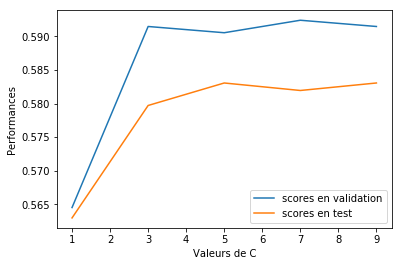

In [36]:
plt.plot(c_values,scores)
plt.plot(c_values,scores_test)
plt.xlabel('Valeurs de C')
plt.ylabel('Performances')
plt.legend(['scores en validation','scores en test'])

In [27]:
def learning_svm(datax,datay, datax_test, datay_test):
    scores=[]
    scores_test = []
    for c in [0.1 , 0.2 , 0.3 , 0.4 , 0.5 , 1]:
        print("C= ",c)
        probas = []
        probas_test=[]
        
        train_ids,val_ids=compute_split(len(datax),seed=1337,pc=0.7)
        train_x=datax[train_ids]
        train_y=datay[train_ids]
        val_x=datax[val_ids]
        val_y=datay[val_ids]
        svms = one_vs_all(c,train_x,train_y)
        for cl in svms.keys():
            clf = svms[cl]
            probas.append(clf.predict_proba(val_x)[:,1])
            probas_test.append(clf.predict_proba(datax_test)[:,1])
        probas = np.array(probas)
        probas_test =np.array(probas_test)
        #print(probas)
        #print("probas.shape",probas.shape)
        ypred = np.argmax(probas,axis=0)  
        ypred_test = np.argmax(probas_test,axis=0)
        #print("ypred",ypred)
        
        #print(len(val_y))
        #print("val_y",val_y)
        #print("ypred==val_y",np.where(ypred==val_y))
        print("score validation:",np.mean(ypred==val_y))
        print("score test: ",np.mean(ypred_test==datay_test))
        scores.append(np.mean(ypred==val_y))   
        scores_test.append(np.mean(ypred_test==datay_test))
    return [0.1 , 0.2 , 0.3 , 0.4 , 0.5 , 1],scores, scores_test   


c_values2,scores2,scores_test2=learning_svm(tmp_x,tmp_y, test_x,test_y)

C=  0.1
score validation: 0.5571030640668524
score test:  0.5518394648829431
C=  0.2
score validation: 0.5571030640668524
score test:  0.5562987736900781
C=  0.3
score validation: 0.552460538532962
score test:  0.5518394648829431
C=  0.4
score validation: 0.5626740947075209
score test:  0.5540691192865106
C=  0.5
score validation: 0.5543175487465181
score test:  0.5551839464882943
C=  1
score validation: 0.5626740947075209
score test:  0.5652173913043478


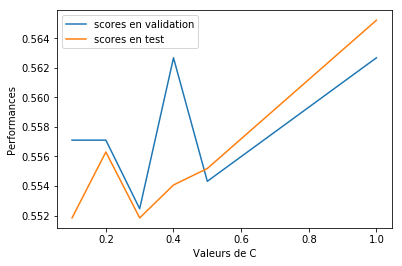

In [34]:
plt.plot(c_values2,scores2)
plt.plot(c_values2,scores_test2)
plt.xlabel('Valeurs de C')
plt.ylabel('Performances')
plt.legend(['scores en validation','scores en test'])